In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/laptop-price-prediction/laptops_train.csv
/kaggle/input/laptop-price-prediction/laptops_test.csv


# Import libraries

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

# Read dataset

In [3]:
train=pd.read_csv("/kaggle/input/laptop-price-prediction/laptops_train.csv")
test=pd.read_csv("/kaggle/input/laptop-price-prediction/laptops_test.csv")
df=pd.concat([train.reset_index(drop=True),
              test.reset_index(drop=True)])
df.head()

,Manufacturer,Model Name,Category,Screen Size,Screen,CPU,RAM,Storage,GPU,Operating System,Operating System Version,Weight,Price
0,Apple,MacBook Pro,Ultrabook,"13.3""",IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,NaN,1.37kg,11912523.48
1,Apple,Macbook Air,Ultrabook,"13.3""",1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,NaN,1.34kg,7993374.48
2,HP,250 G6,Notebook,"15.6""",Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,NaN,1.86kg,5112900.00
3,Apple,MacBook Pro,Ultrabook,"15.4""",IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,NaN,1.83kg,22563005.40
4,Apple,MacBook Pro,Ultrabook,"13.3""",IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,NaN,1.37kg,16037611.20


# Basic steps

1.info
2.describe
3.pandas profiling

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1302 entries, 0 to 324
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Manufacturer              1302 non-null   object 
 1   Model Name                1302 non-null   object 
 2   Category                  1302 non-null   object 
 3   Screen Size               1302 non-null   object 
 4   Screen                    1302 non-null   object 
 5   CPU                       1302 non-null   object 
 6   RAM                       1302 non-null   object 
 7    Storage                  1302 non-null   object 
 8   GPU                       1302 non-null   object 
 9   Operating System          1302 non-null   object 
 10  Operating System Version  1132 non-null   object 
 11  Weight                    1302 non-null   object 
 12  Price                     1302 non-null   float64
dtypes: float64(1), object(12)
memory usage: 142.4+ KB


In [5]:
df.columns

Index(['Manufacturer', 'Model Name', 'Category', 'Screen Size', 'Screen',
       'CPU', 'RAM', ' Storage', 'GPU', 'Operating System',
       'Operating System Version', 'Weight', 'Price'],
      dtype='object')

In [6]:
df.rename(columns = {"Model Name":"Model_Name","Screen Size":"Screen_Size"," Storage":"Storage","Operating System":"OS","Operating System Version":"OS_Version"},inplace=True)
df.head()

,Manufacturer,Model_Name,Category,Screen_Size,Screen,CPU,RAM,Storage,GPU,OS,OS_Version,Weight,Price
0,Apple,MacBook Pro,Ultrabook,"13.3""",IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,NaN,1.37kg,11912523.48
1,Apple,Macbook Air,Ultrabook,"13.3""",1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,NaN,1.34kg,7993374.48
2,HP,250 G6,Notebook,"15.6""",Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,NaN,1.86kg,5112900.00
3,Apple,MacBook Pro,Ultrabook,"15.4""",IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,NaN,1.83kg,22563005.40
4,Apple,MacBook Pro,Ultrabook,"13.3""",IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,NaN,1.37kg,16037611.20


In [7]:
df.drop_duplicates()

,Manufacturer,Model_Name,Category,Screen_Size,Screen,CPU,RAM,Storage,GPU,OS,OS_Version,Weight,Price
0,Apple,MacBook Pro,Ultrabook,"13.3""",IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,NaN,1.37kg,11912523.48
1,Apple,Macbook Air,Ultrabook,"13.3""",1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,NaN,1.34kg,7993374.48
2,HP,250 G6,Notebook,"15.6""",Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,NaN,1.86kg,5112900.00
3,Apple,MacBook Pro,Ultrabook,"15.4""",IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,NaN,1.83kg,22563005.40
4,Apple,MacBook Pro,Ultrabook,"13.3""",IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,NaN,1.37kg,16037611.20
...,...,...,...,...,...,...,...,...,...,...,...,...,...
292,Lenovo,Yoga 500-14ISK,2 in 1 Convertible,"14.0""",IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i7 6500U 2.5GHz,4GB,128GB SSD,Intel HD Graphics 520,Windows,10,1.8kg,5673096.00
293,Lenovo,Yoga 900-13ISK,2 in 1 Convertible,"13.3""",IPS Panel Quad HD+ / Touchscreen 3200x1800,Intel Core i7 6500U 2.5GHz,16GB,512GB SSD,Intel HD Graphics 520,Windows,10,1.3kg,13329108.00
294,Lenovo,IdeaPad 100S-14IBR,Notebook,"14.0""",1366x768,Intel Celeron Dual Core N3050 1.6GHz,2GB,64GB Flash Storage,Intel HD Graphics,Windows,10,1.5kg,2036268.00
295,HP,15-AC110nv (i7-6500U/6GB/1TB/Radeon,Notebook,"15.6""",1366x768,Intel Core i7 6500U 2.5GHz,6GB,1TB HDD,AMD Radeon R5 M330,Windows,10,2.19kg,6793488.00


# missing value handling

In [8]:
df.isnull().sum()

Manufacturer      0
Model_Name        0
Category          0
Screen_Size       0
Screen            0
CPU               0
RAM               0
Storage           0
GPU               0
OS                0
OS_Version      170
Weight            0
Price             0
dtype: int64

In [9]:
df['OS_Version'].value_counts()

OS_Version
10      1071
7         45
X          8
10 S       8
Name: count, dtype: int64

In [10]:
df['OS_Version']=df['OS_Version'].fillna(df['OS_Version'].mode()[0])

In [11]:
df.isnull().sum()

Manufacturer    0
Model_Name      0
Category        0
Screen_Size     0
Screen          0
CPU             0
RAM             0
Storage         0
GPU             0
OS              0
OS_Version      0
Weight          0
Price           0
dtype: int64

In [12]:
df.describe()

,Price
count,1.302000e+03
mean,9.987213e+06
std,6.215746e+06
min,1.547208e+06
25%,5.326308e+06
50%,8.687484e+06
75%,1.321198e+07
max,5.423231e+07


In [13]:
df.head()

,Manufacturer,Model_Name,Category,Screen_Size,Screen,CPU,RAM,Storage,GPU,OS,OS_Version,Weight,Price
0,Apple,MacBook Pro,Ultrabook,"13.3""",IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,10,1.37kg,11912523.48
1,Apple,Macbook Air,Ultrabook,"13.3""",1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,10,1.34kg,7993374.48
2,HP,250 G6,Notebook,"15.6""",Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,10,1.86kg,5112900.00
3,Apple,MacBook Pro,Ultrabook,"15.4""",IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,10,1.83kg,22563005.40
4,Apple,MacBook Pro,Ultrabook,"13.3""",IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,10,1.37kg,16037611.20


# Check unique values and understand data

In [14]:
for i in df.columns:
    print(df[i].value_counts(),'\n')

Manufacturer
Dell         297
Lenovo       297
HP           274
Asus         157
Acer         103
MSI           54
Toshiba       48
Apple         21
Samsung        9
Razer          7
Mediacom       7
Microsoft      6
Xiaomi         4
Vero           4
Chuwi          3
Google         3
Fujitsu        3
LG             3
Huawei         2
Name: count, dtype: int64 

Model_Name
XPS 13                                  30
Inspiron 3567                           29
250 G6                                  21
Legion Y520-15IKBN                      19
Vostro 3568                             19
                                        ..
SmartBook 130                            1
A541NA-GO342 (N3350/4GB/500GB/Linux)     1
17-X047na (i3-6006U/8GB/1TB/W10)         1
V310-15ISK (i5-6200U/4GB/1TB/FHD/No      1
15-cd005nv (A9-9420/6GB/256GB/Radeon     1
Name: count, Length: 617, dtype: int64 

Category
Notebook              727
Gaming                205
Ultrabook             196
2 in 1 Convertible    12

# Analyse dataset

In [15]:
def order(x,num):
    return df[x].value_counts().head(num).index

# Laptop manufacturer

<Axes: title={'center': 'Popular Manufacturer of Laptops'}, xlabel='count', ylabel='Manufacturer'>

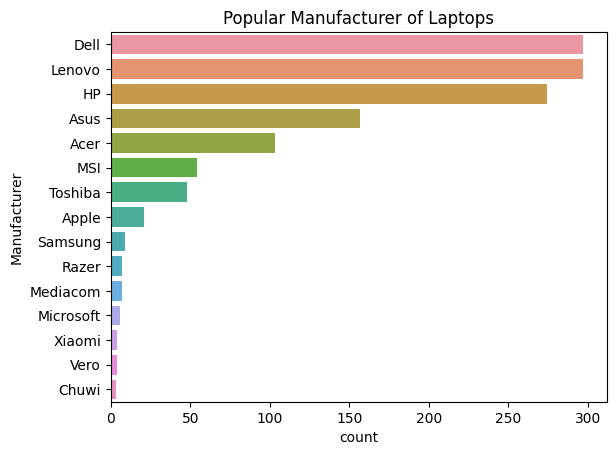

In [16]:
plt.title('Popular Manufacturer of Laptops')
sns.countplot(y=df['Manufacturer'],order=order('Manufacturer',15))

In [17]:
df['Manufacturer'].value_counts()

Manufacturer
Dell         297
Lenovo       297
HP           274
Asus         157
Acer         103
MSI           54
Toshiba       48
Apple         21
Samsung        9
Razer          7
Mediacom       7
Microsoft      6
Xiaomi         4
Vero           4
Chuwi          3
Google         3
Fujitsu        3
LG             3
Huawei         2
Name: count, dtype: int64

# Lable encoder

In [18]:
from sklearn.preprocessing import LabelEncoder
lr=LabelEncoder()
df['Manufacturer']=lr.fit_transform(df['Manufacturer'])

In [19]:
print(lr.classes_)

['Acer' 'Apple' 'Asus' 'Chuwi' 'Dell' 'Fujitsu' 'Google' 'HP' 'Huawei'
 'LG' 'Lenovo' 'MSI' 'Mediacom' 'Microsoft' 'Razer' 'Samsung' 'Toshiba'
 'Vero' 'Xiaomi']


In [20]:
df['Manufacturer'].head()

0    1
1    1
2    7
3    1
4    1
Name: Manufacturer, dtype: int64

In [21]:
df.head()

,Manufacturer,Model_Name,Category,Screen_Size,Screen,CPU,RAM,Storage,GPU,OS,OS_Version,Weight,Price
0,1,MacBook Pro,Ultrabook,"13.3""",IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,10,1.37kg,11912523.48
1,1,Macbook Air,Ultrabook,"13.3""",1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,10,1.34kg,7993374.48
2,7,250 G6,Notebook,"15.6""",Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,10,1.86kg,5112900.00
3,1,MacBook Pro,Ultrabook,"15.4""",IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,10,1.83kg,22563005.40
4,1,MacBook Pro,Ultrabook,"13.3""",IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,10,1.37kg,16037611.20


# Model name

In [22]:
df['Model_Name'].unique()

array(['MacBook Pro', 'Macbook Air', '250 G6', 'Aspire 3',
       'ZenBook UX430UN', 'Swift 3', 'Inspiron 3567', 'MacBook 12"',
       'IdeaPad 320-15IKB', 'XPS 13', 'Vivobook E200HA',
       'Legion Y520-15IKBN', '255 G6', 'Inspiron 5379',
       '15-BS101nv (i7-8550U/8GB/256GB/FHD/W10)', 'MacBook Air',
       'Inspiron 5570', 'Latitude 5590', 'ProBook 470', 'LapBook 15.6"',
       'E402WA-GA010T (E2-6110/2GB/32GB/W10)',
       '17-ak001nv (A6-9220/4GB/500GB/Radeon', 'IdeaPad 120S-14IAP',
       'Inspiron 5770', 'ProBook 450',
       'X540UA-DM186 (i3-6006U/4GB/1TB/FHD/Linux)', 'Inspiron 7577',
       'X542UQ-GO005 (i5-7200U/8GB/1TB/GeForce', 'Aspire A515-51G',
       'Inspiron 7773', 'IdeaPad 320-15ISK', 'Rog Strix',
       'X751NV-TY001T (N4200/4GB/1TB/GeForce', 'Yoga Book', 'ProBook 430',
       'Inspiron 3576', '15-bs002nv (i3-6006U/4GB/128GB/FHD/W10)',
       'VivoBook Max', 'GS73VR 7RG',
       'X541UA-DM1897 (i3-6006U/4GB/256GB/FHD/Linux)', 'Vostro 5471',
       'IdeaPad 520S-1

In [23]:
len(df['Model_Name'].value_counts())

617

In [24]:
df.drop('Model_Name',axis=1,inplace=True)

# Category of laptops

<Axes: title={'center': 'Laptop popularity by catrgory'}, xlabel='count', ylabel='Category'>

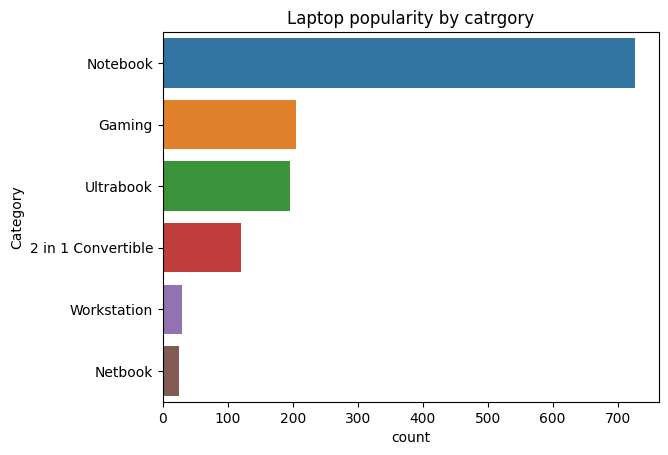

In [25]:
plt.title('Laptop popularity by catrgory')
sns.countplot(y=df['Category'],order=order('Category',10))

In [26]:
df['Category'].replace({"Netbook":'Notebook'},inplace=True)

In [27]:
df['Category'].unique()

array(['Ultrabook', 'Notebook', 'Gaming', '2 in 1 Convertible',
       'Workstation'], dtype=object)

In [28]:
lr=LabelEncoder()

df['Category']=lr.fit_transform(df['Category'])

In [29]:
print(lr.classes_)

['2 in 1 Convertible' 'Gaming' 'Notebook' 'Ultrabook' 'Workstation']


In [30]:
df.head()

,Manufacturer,Category,Screen_Size,Screen,CPU,RAM,Storage,GPU,OS,OS_Version,Weight,Price
0,1,3,"13.3""",IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,10,1.37kg,11912523.48
1,1,3,"13.3""",1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,10,1.34kg,7993374.48
2,7,2,"15.6""",Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,10,1.86kg,5112900.00
3,1,3,"15.4""",IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,10,1.83kg,22563005.40
4,1,3,"13.3""",IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,10,1.37kg,16037611.20


# Screen size

In [31]:
df['Screen_Size'].unique()

array(['13.3"', '15.6"', '15.4"', '14.0"', '12.0"', '11.6"', '17.3"',
       '10.1"', '13.5"', '12.5"', '13.0"', '18.4"', '13.9"', '12.3"',
       '17.0"', '15.0"', '14.1"', '11.3"'], dtype=object)

In [32]:
df['Screen_Size'].nunique()

18

In [33]:
df['Screen_Size']=df['Screen_Size'].str.replace('"','').astype('float')

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1302 entries, 0 to 324
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Manufacturer  1302 non-null   int64  
 1   Category      1302 non-null   int64  
 2   Screen_Size   1302 non-null   float64
 3   Screen        1302 non-null   object 
 4   CPU           1302 non-null   object 
 5   RAM           1302 non-null   object 
 6   Storage       1302 non-null   object 
 7   GPU           1302 non-null   object 
 8   OS            1302 non-null   object 
 9   OS_Version    1302 non-null   object 
 10  Weight        1302 non-null   object 
 11  Price         1302 non-null   float64
dtypes: float64(2), int64(2), object(8)
memory usage: 132.2+ KB


# Screen

In [35]:
df.Screen.unique()

array(['IPS Panel Retina Display 2560x1600', '1440x900',
       'Full HD 1920x1080', 'IPS Panel Retina Display 2880x1800',
       '1366x768', 'IPS Panel Full HD 1920x1080',
       'IPS Panel Retina Display 2304x1440',
       'IPS Panel Full HD / Touchscreen 1920x1080',
       'Full HD / Touchscreen 1920x1080',
       'Touchscreen / Quad HD+ 3200x1800',
       'IPS Panel Touchscreen 1920x1200', 'Touchscreen 2256x1504',
       'Quad HD+ / Touchscreen 3200x1800', 'IPS Panel 1366x768',
       'IPS Panel 4K Ultra HD / Touchscreen 3840x2160',
       'IPS Panel Full HD 2160x1440',
       '4K Ultra HD / Touchscreen 3840x2160', 'Touchscreen 2560x1440',
       '1600x900', 'IPS Panel 4K Ultra HD 3840x2160',
       '4K Ultra HD 3840x2160', 'Touchscreen 1366x768',
       'IPS Panel Full HD 1366x768', 'IPS Panel 2560x1440',
       'IPS Panel Full HD 2560x1440',
       'IPS Panel Retina Display 2736x1824', 'Touchscreen 2400x1600',
       '2560x1440', 'IPS Panel Quad HD+ 2560x1440',
       'IPS Panel 

In [36]:
df['Touchscreen']=df['Screen'].str.contains('Touchscreen',case=False).astype('int')

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1302 entries, 0 to 324
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Manufacturer  1302 non-null   int64  
 1   Category      1302 non-null   int64  
 2   Screen_Size   1302 non-null   float64
 3   Screen        1302 non-null   object 
 4   CPU           1302 non-null   object 
 5   RAM           1302 non-null   object 
 6   Storage       1302 non-null   object 
 7   GPU           1302 non-null   object 
 8   OS            1302 non-null   object 
 9   OS_Version    1302 non-null   object 
 10  Weight        1302 non-null   object 
 11  Price         1302 non-null   float64
 12  Touchscreen   1302 non-null   int64  
dtypes: float64(2), int64(3), object(8)
memory usage: 142.4+ KB


In [38]:
df['Touchscreen'].value_counts()

Touchscreen
0    1111
1     191
Name: count, dtype: int64

([<matplotlib.patches.Wedge at 0x7b1500e45d80>,
 [Text(-0.9852357053278478, 0.48919383167323216, 'Yes'),
  Text(0.9852356824270305, -0.48919387779544377, 'No')],
 [Text(-0.5374012938151896, 0.2668329990944902, '85.3%'),
  Text(0.5374012813238348, -0.2668330242520602, '14.7%')])

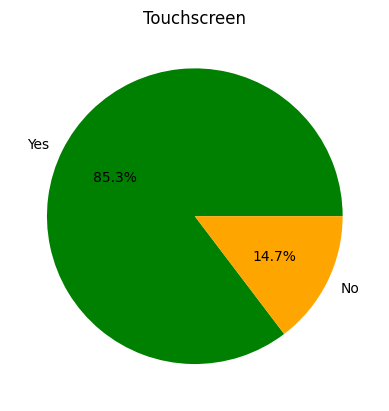

In [39]:
plt.title('Touchscreen')
plt.pie(df['Touchscreen'].value_counts(),labels=['Yes','No'],autopct='%.1f%%',colors=['Green','Orange'])

In [40]:
#IPS
df['IPS_Panel']= df['Screen'].str.contains('IPS',case=False).astype('int')

In [41]:
df['IPS_Panel'].value_counts()

IPS_Panel
0    937
1    365
Name: count, dtype: int64

In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1302 entries, 0 to 324
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Manufacturer  1302 non-null   int64  
 1   Category      1302 non-null   int64  
 2   Screen_Size   1302 non-null   float64
 3   Screen        1302 non-null   object 
 4   CPU           1302 non-null   object 
 5   RAM           1302 non-null   object 
 6   Storage       1302 non-null   object 
 7   GPU           1302 non-null   object 
 8   OS            1302 non-null   object 
 9   OS_Version    1302 non-null   object 
 10  Weight        1302 non-null   object 
 11  Price         1302 non-null   float64
 12  Touchscreen   1302 non-null   int64  
 13  IPS_Panel     1302 non-null   int64  
dtypes: float64(2), int64(4), object(8)
memory usage: 152.6+ KB


([<matplotlib.patches.Wedge at 0x7b1500c68f70>,
 [Text(-0.7002661873943783, 0.8483084738419991, 'Yes'),
  Text(0.7002661873943782, -0.8483084738419993, 'No')],
 [Text(-0.38196337494238813, 0.46271371300472675, '72.0%'),
  Text(0.381963374942388, -0.4627137130047268, '28.0%')])

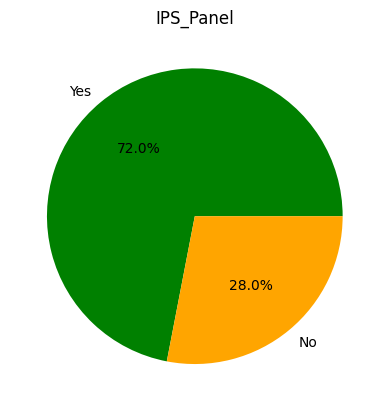

In [43]:
plt.title('IPS_Panel')
plt.pie(df['IPS_Panel'].value_counts(),labels=['Yes','No'],autopct='%.1f%%',colors=['Green','Orange'])

In [44]:
#Retina
df['Retina_display']= df['Screen'].str.contains('Retina',case=False).astype('int')

In [45]:
df['Retina_display'].value_counts()

Retina_display
0    1285
1      17
Name: count, dtype: int64

In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1302 entries, 0 to 324
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Manufacturer    1302 non-null   int64  
 1   Category        1302 non-null   int64  
 2   Screen_Size     1302 non-null   float64
 3   Screen          1302 non-null   object 
 4   CPU             1302 non-null   object 
 5   RAM             1302 non-null   object 
 6   Storage         1302 non-null   object 
 7   GPU             1302 non-null   object 
 8   OS              1302 non-null   object 
 9   OS_Version      1302 non-null   object 
 10  Weight          1302 non-null   object 
 11  Price           1302 non-null   float64
 12  Touchscreen     1302 non-null   int64  
 13  IPS_Panel       1302 non-null   int64  
 14  Retina_display  1302 non-null   int64  
dtypes: float64(2), int64(5), object(8)
memory usage: 162.8+ KB


([<matplotlib.patches.Wedge at 0x7b1500c9fe80>,
 [Text(-1.0990747139403685, 0.04510846014770897, 'Yes'),
  Text(1.0990747169759052, -0.04510838618632075, 'No')],
 [Text(-0.5994952985129282, 0.024604614626023074, '98.7%'),
  Text(0.5994953001686755, -0.024604574283447683, '1.3%')])

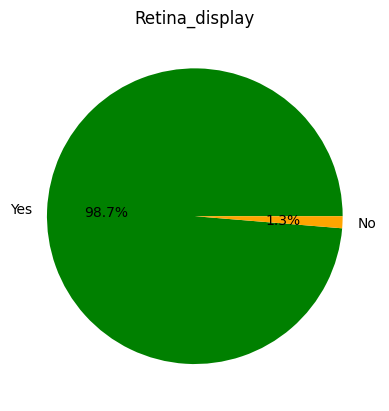

In [47]:
plt.title('Retina_display')
plt.pie(df['Retina_display'].value_counts(),labels=['Yes','No'],autopct='%.1f%%',colors=['Green','Orange'])

In [48]:
#Full_HD_display

df['Full_HD_display']= df['Screen'].str.contains('Full_HD',case=False).astype('int')

In [49]:
df['Full_HD_display'].value_counts()

Full_HD_display
0    1302
Name: count, dtype: int64

In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1302 entries, 0 to 324
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Manufacturer     1302 non-null   int64  
 1   Category         1302 non-null   int64  
 2   Screen_Size      1302 non-null   float64
 3   Screen           1302 non-null   object 
 4   CPU              1302 non-null   object 
 5   RAM              1302 non-null   object 
 6   Storage          1302 non-null   object 
 7   GPU              1302 non-null   object 
 8   OS               1302 non-null   object 
 9   OS_Version       1302 non-null   object 
 10  Weight           1302 non-null   object 
 11  Price            1302 non-null   float64
 12  Touchscreen      1302 non-null   int64  
 13  IPS_Panel        1302 non-null   int64  
 14  Retina_display   1302 non-null   int64  
 15  Full_HD_display  1302 non-null   int64  
dtypes: float64(2), int64(6), object(8)
memory usage: 172.9+ KB


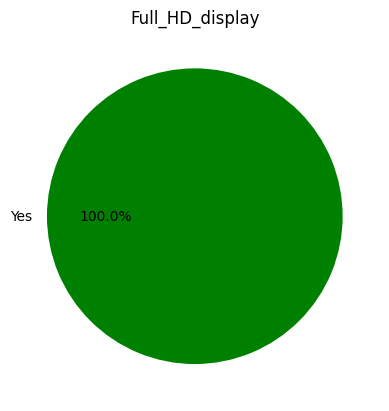

In [51]:
plt.title('Full_HD_display')
plt.pie(df['Full_HD_display'].value_counts(),labels=['Yes'],autopct='%.1f%%',colors=['Green','Orange'])
plt.show()

In [52]:
#Quad_HD_display

df['Quad_HD_display']= df['Screen'].str.contains('Quad_HD',case=False).astype('int')

In [53]:
df['Quad_HD_display'].value_counts()

Quad_HD_display
0    1302
Name: count, dtype: int64

In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1302 entries, 0 to 324
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Manufacturer     1302 non-null   int64  
 1   Category         1302 non-null   int64  
 2   Screen_Size      1302 non-null   float64
 3   Screen           1302 non-null   object 
 4   CPU              1302 non-null   object 
 5   RAM              1302 non-null   object 
 6   Storage          1302 non-null   object 
 7   GPU              1302 non-null   object 
 8   OS               1302 non-null   object 
 9   OS_Version       1302 non-null   object 
 10  Weight           1302 non-null   object 
 11  Price            1302 non-null   float64
 12  Touchscreen      1302 non-null   int64  
 13  IPS_Panel        1302 non-null   int64  
 14  Retina_display   1302 non-null   int64  
 15  Full_HD_display  1302 non-null   int64  
 16  Quad_HD_display  1302 non-null   int64  
dtypes: float64(2), int64

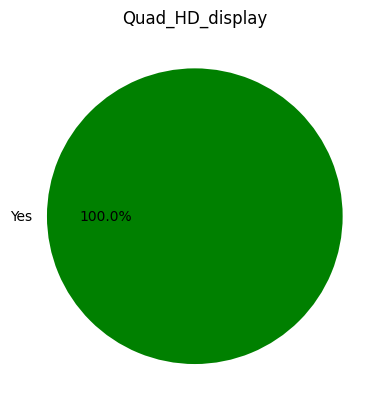

In [55]:
plt.title('Quad_HD_display')
plt.pie(df['Quad_HD_display'].value_counts(),labels=['Yes'],autopct='%.1f%%',colors=['Green','Orange'])
plt.show()

In [56]:
df['xres'] = df['Screen'].str.extract(r'(\d+)x\d+').astype('int')
df['yres'] = df['Screen'].str.extract(r'\d+x(\d+)').astype('int')
df.drop('Screen',axis=1,inplace=True)

In [57]:
df['PPI']=(((df['xres']**2+df['yres']**2)**0.5)/df['Screen_Size'])

In [58]:
df.drop(['xres','yres'],axis=1,inplace=True)

In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1302 entries, 0 to 324
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Manufacturer     1302 non-null   int64  
 1   Category         1302 non-null   int64  
 2   Screen_Size      1302 non-null   float64
 3   CPU              1302 non-null   object 
 4   RAM              1302 non-null   object 
 5   Storage          1302 non-null   object 
 6   GPU              1302 non-null   object 
 7   OS               1302 non-null   object 
 8   OS_Version       1302 non-null   object 
 9   Weight           1302 non-null   object 
 10  Price            1302 non-null   float64
 11  Touchscreen      1302 non-null   int64  
 12  IPS_Panel        1302 non-null   int64  
 13  Retina_display   1302 non-null   int64  
 14  Full_HD_display  1302 non-null   int64  
 15  Quad_HD_display  1302 non-null   int64  
 16  PPI              1302 non-null   float64
dtypes: float64(3), int64

# Weight

In [60]:
df['Weight'].value_counts().head(10)

Weight
2.2kg     121
2.1kg      58
2.4kg      44
2.3kg      40
2.5kg      38
2kg        35
2.8kg      28
1.2kg      26
1.86kg     25
1.4kg      24
Name: count, dtype: int64

In [61]:
df['Weight']=df['Weight'].str.extract(r'(\d+\.?\d*)').astype('float')

# GPU

In [62]:
n=df['GPU'].str.split('',n=1,expand=True)
df['GPU']=n[0]
df['GPU'].value_counts()

GPU
    1302
Name: count, dtype: int64

In [63]:
df.head()

,Manufacturer,Category,Screen_Size,CPU,RAM,Storage,GPU,OS,OS_Version,Weight,Price,Touchscreen,IPS_Panel,Retina_display,Full_HD_display,Quad_HD_display,PPI
0,1,3,13.3,Intel Core i5 2.3GHz,8GB,128GB SSD,,macOS,10,1.37,11912523.48,0,1,1,0,0,226.983005
1,1,3,13.3,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,,macOS,10,1.34,7993374.48,0,0,0,0,0,127.677940
2,7,2,15.6,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,,No OS,10,1.86,5112900.00,0,0,0,0,0,141.211998
3,1,3,15.4,Intel Core i7 2.7GHz,16GB,512GB SSD,,macOS,10,1.83,22563005.40,0,1,1,0,0,220.534624
4,1,3,13.3,Intel Core i5 3.1GHz,8GB,256GB SSD,,macOS,10,1.37,16037611.20,0,1,1,0,0,226.983005


In [64]:
lr=LabelEncoder()
df['GPU']=lr.fit_transform(df['GPU'])

# RAM

In [65]:
df['RAM']=df['RAM'].str.replace('GB','')
df['RAM']=df['RAM'].astype('int')                                

In [66]:
df.head()

,Manufacturer,Category,Screen_Size,CPU,RAM,Storage,GPU,OS,OS_Version,Weight,Price,Touchscreen,IPS_Panel,Retina_display,Full_HD_display,Quad_HD_display,PPI
0,1,3,13.3,Intel Core i5 2.3GHz,8,128GB SSD,0,macOS,10,1.37,11912523.48,0,1,1,0,0,226.983005
1,1,3,13.3,Intel Core i5 1.8GHz,8,128GB Flash Storage,0,macOS,10,1.34,7993374.48,0,0,0,0,0,127.677940
2,7,2,15.6,Intel Core i5 7200U 2.5GHz,8,256GB SSD,0,No OS,10,1.86,5112900.00,0,0,0,0,0,141.211998
3,1,3,15.4,Intel Core i7 2.7GHz,16,512GB SSD,0,macOS,10,1.83,22563005.40,0,1,1,0,0,220.534624
4,1,3,13.3,Intel Core i5 3.1GHz,8,256GB SSD,0,macOS,10,1.37,16037611.20,0,1,1,0,0,226.983005


In [67]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1302 entries, 0 to 324
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Manufacturer     1302 non-null   int64  
 1   Category         1302 non-null   int64  
 2   Screen_Size      1302 non-null   float64
 3   CPU              1302 non-null   object 
 4   RAM              1302 non-null   int64  
 5   Storage          1302 non-null   object 
 6   GPU              1302 non-null   int64  
 7   OS               1302 non-null   object 
 8   OS_Version       1302 non-null   object 
 9   Weight           1302 non-null   float64
 10  Price            1302 non-null   float64
 11  Touchscreen      1302 non-null   int64  
 12  IPS_Panel        1302 non-null   int64  
 13  Retina_display   1302 non-null   int64  
 14  Full_HD_display  1302 non-null   int64  
 15  Quad_HD_display  1302 non-null   int64  
 16  PPI              1302 non-null   float64
dtypes: float64(4), int64

# OS_Version

In [68]:
df.drop('OS_Version',axis=1,inplace=True)

In [69]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1302 entries, 0 to 324
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Manufacturer     1302 non-null   int64  
 1   Category         1302 non-null   int64  
 2   Screen_Size      1302 non-null   float64
 3   CPU              1302 non-null   object 
 4   RAM              1302 non-null   int64  
 5   Storage          1302 non-null   object 
 6   GPU              1302 non-null   int64  
 7   OS               1302 non-null   object 
 8   Weight           1302 non-null   float64
 9   Price            1302 non-null   float64
 10  Touchscreen      1302 non-null   int64  
 11  IPS_Panel        1302 non-null   int64  
 12  Retina_display   1302 non-null   int64  
 13  Full_HD_display  1302 non-null   int64  
 14  Quad_HD_display  1302 non-null   int64  
 15  PPI              1302 non-null   float64
dtypes: float64(4), int64(9), object(3)
memory usage: 172.9+ KB


# OS

In [70]:
lr=LabelEncoder()
df['OS']=lr.fit_transform(df['OS'])

In [71]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1302 entries, 0 to 324
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Manufacturer     1302 non-null   int64  
 1   Category         1302 non-null   int64  
 2   Screen_Size      1302 non-null   float64
 3   CPU              1302 non-null   object 
 4   RAM              1302 non-null   int64  
 5   Storage          1302 non-null   object 
 6   GPU              1302 non-null   int64  
 7   OS               1302 non-null   int64  
 8   Weight           1302 non-null   float64
 9   Price            1302 non-null   float64
 10  Touchscreen      1302 non-null   int64  
 11  IPS_Panel        1302 non-null   int64  
 12  Retina_display   1302 non-null   int64  
 13  Full_HD_display  1302 non-null   int64  
 14  Quad_HD_display  1302 non-null   int64  
 15  PPI              1302 non-null   float64
dtypes: float64(4), int64(10), object(2)
memory usage: 172.9+ KB


In [72]:
df.head()

,Manufacturer,Category,Screen_Size,CPU,RAM,Storage,GPU,OS,Weight,Price,Touchscreen,IPS_Panel,Retina_display,Full_HD_display,Quad_HD_display,PPI
0,1,3,13.3,Intel Core i5 2.3GHz,8,128GB SSD,0,6,1.37,11912523.48,0,1,1,0,0,226.983005
1,1,3,13.3,Intel Core i5 1.8GHz,8,128GB Flash Storage,0,6,1.34,7993374.48,0,0,0,0,0,127.677940
2,7,2,15.6,Intel Core i5 7200U 2.5GHz,8,256GB SSD,0,4,1.86,5112900.00,0,0,0,0,0,141.211998
3,1,3,15.4,Intel Core i7 2.7GHz,16,512GB SSD,0,6,1.83,22563005.40,0,1,1,0,0,220.534624
4,1,3,13.3,Intel Core i5 3.1GHz,8,256GB SSD,0,6,1.37,16037611.20,0,1,1,0,0,226.983005


# CPU

In [73]:
df['CPU'].value_counts().head(10)

CPU
Intel Core i5 7200U 2.5GHz     190
Intel Core i7 7700HQ 2.8GHz    146
Intel Core i7 7500U 2.7GHz     133
Intel Core i7 8550U 1.8GHz      73
Intel Core i5 8250U 1.6GHz      72
Intel Core i5 6200U 2.3GHz      68
Intel Core i3 6006U 2GHz        64
Intel Core i7 6500U 2.5GHz      49
Intel Core i7 6700HQ 2.6GHz     43
Intel Core i3 7100U 2.4GHz      37
Name: count, dtype: int64

In [74]:
df['Pro_Name']=df['CPU'].apply([lambda x:''.join(x.split()[0:3])])
df['Pro_Name'].head(10)

0         IntelCorei5
1         IntelCorei5
2         IntelCorei5
3         IntelCorei7
4         IntelCorei5
5    AMDA9-Series9420
6         IntelCorei7
7         IntelCorei5
8         IntelCorei7
9         IntelCorei5
Name: Pro_Name, dtype: object

In [75]:
df['Pro_Name'].value_counts().head(20)

Pro_Name
IntelCorei7            526
IntelCorei5            423
IntelCorei3            136
IntelCeleronDual        80
IntelPentiumQuad        27
IntelCoreM              19
AMDA9-Series9420        12
IntelCeleronQuad         8
AMDA6-Series9220         8
AMDA12-Series9720P       7
IntelAtomx5-Z8350        5
AMDA8-Series7410         4
IntelAtomx5-Z8550        4
IntelPentiumDual         3
AMDA9-Series9410         3
AMDRyzen1700             3
AMDA9-SeriesA9-9420      2
AMDA10-Series9620P       2
IntelAtomX5-Z8350        2
AMDE-SeriesE2-9000e      2
Name: count, dtype: int64

In [76]:
lr=LabelEncoder()
df['CPU']=lr.fit_transform(df['Pro_Name'])

In [77]:
lr=LabelEncoder()
df['Pro_Name']=lr.fit_transform(df['Pro_Name'])

In [78]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1302 entries, 0 to 324
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Manufacturer     1302 non-null   int64  
 1   Category         1302 non-null   int64  
 2   Screen_Size      1302 non-null   float64
 3   CPU              1302 non-null   int64  
 4   RAM              1302 non-null   int64  
 5   Storage          1302 non-null   object 
 6   GPU              1302 non-null   int64  
 7   OS               1302 non-null   int64  
 8   Weight           1302 non-null   float64
 9   Price            1302 non-null   float64
 10  Touchscreen      1302 non-null   int64  
 11  IPS_Panel        1302 non-null   int64  
 12  Retina_display   1302 non-null   int64  
 13  Full_HD_display  1302 non-null   int64  
 14  Quad_HD_display  1302 non-null   int64  
 15  PPI              1302 non-null   float64
 16  Pro_Name         1302 non-null   int64  
dtypes: float64(4), int64

In [79]:
df.head()

,Manufacturer,Category,Screen_Size,CPU,RAM,Storage,GPU,OS,Weight,Price,Touchscreen,IPS_Panel,Retina_display,Full_HD_display,Quad_HD_display,PPI,Pro_Name
0,1,3,13.3,33,8,128GB SSD,0,6,1.37,11912523.48,0,1,1,0,0,226.983005,33
1,1,3,13.3,33,8,128GB Flash Storage,0,6,1.34,7993374.48,0,0,0,0,0,127.677940,33
2,7,2,15.6,33,8,256GB SSD,0,4,1.86,5112900.00,0,0,0,0,0,141.211998,33
3,1,3,15.4,34,16,512GB SSD,0,6,1.83,22563005.40,0,1,1,0,0,220.534624,34
4,1,3,13.3,33,8,256GB SSD,0,6,1.37,16037611.20,0,1,1,0,0,226.983005,33


# Storage

In [80]:
df.columns

Index(['Manufacturer', 'Category', 'Screen_Size', 'CPU', 'RAM', 'Storage',
       'GPU', 'OS', 'Weight', 'Price', 'Touchscreen', 'IPS_Panel',
       'Retina_display', 'Full_HD_display', 'Quad_HD_display', 'PPI',
       'Pro_Name'],
      dtype='object')

In [81]:
df['Storage']=df['Storage'].str.replace('GB','')
df['Storage']=df['Storage'].str.replace('TB','000')
first = df["Storage"].str.split("+",n=1,expand=True)

In [82]:
df['Part1']=first[0]
df['Part2']=first[1]

In [83]:
df['Part1']=df['Part1'].str.strip()
df['Part2'].fillna('0',inplace=True)

In [84]:
df["Storage1_SSD"]=df["Part1"].apply(lambda x:1 if"SSD"in x else 0)
df["Storage1_HDD"]=df["Part1"].apply(lambda x:1 if"HDD"in x else 0)
df["Storage1_Flash_Storage"]=df["Part1"].apply(lambda x:1 if"Flash_Storage"in x else 0)
df["Storage1_Hybrid_Storage"]=df["Part1"].apply(lambda x:1 if"Hybrid"in x else 0)

In [85]:
df["Storage2_SSD"]=df["Part2"].apply(lambda x:1 if"SSD"in x else 0)
df["Storage2_HDD"]=df["Part2"].apply(lambda x:1 if"HDD"in x else 0)
df["Storage2_Flash_Storage"]=df["Part2"].apply(lambda x:1 if"Flash_Storage"in x else 0)


In [86]:
df['Part1']=df['Part1'].str.replace(r'\D+','',regex=True).astype(int)
df['Part2']=df['Part2'].str.replace(r'\D+','',regex=True).astype(int)
df['Part1'].dtype

df["SSD"]=(df["Part1"]*df["Storage1_SSD"]+df["Part2"]*df["Storage2_SSD"])
df["HDD"]=(df["Part1"]*df["Storage1_HDD"]+df["Part2"]*df["Storage2_HDD"])
df["Flash_Storage"]=(df["Part1"]*df["Storage1_Flash_Storage"]+df["Part2"]*df["Storage2_Flash_Storage"])
df["Hybrid_Storage"]=(df["Part1"]*df["Storage1_Hybrid_Storage"]+df["Part2"]*df["Storage1_Hybrid_Storage"])

df.drop(columns=['Part1','Part2','Storage1_SSD','Storage1_HDD','Storage1_Flash_Storage','Storage2_SSD','Storage2_HDD','Storage2_Flash_Storage','Storage1_Hybrid_Storage','Storage'],axis=1,inplace = True)
df.head()


,Manufacturer,Category,Screen_Size,CPU,RAM,GPU,OS,Weight,Price,Touchscreen,IPS_Panel,Retina_display,Full_HD_display,Quad_HD_display,PPI,Pro_Name,SSD,HDD,Flash_Storage,Hybrid_Storage
0,1,3,13.3,33,8,0,6,1.37,11912523.48,0,1,1,0,0,226.983005,33,128,0,0,0
1,1,3,13.3,33,8,0,6,1.34,7993374.48,0,0,0,0,0,127.677940,33,0,0,0,0
2,7,2,15.6,33,8,0,4,1.86,5112900.00,0,0,0,0,0,141.211998,33,256,0,0,0
3,1,3,15.4,34,16,0,6,1.83,22563005.40,0,1,1,0,0,220.534624,34,512,0,0,0
4,1,3,13.3,33,8,0,6,1.37,16037611.20,0,1,1,0,0,226.983005,33,256,0,0,0


In [87]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1302 entries, 0 to 324
Data columns (total 20 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Manufacturer     1302 non-null   int64  
 1   Category         1302 non-null   int64  
 2   Screen_Size      1302 non-null   float64
 3   CPU              1302 non-null   int64  
 4   RAM              1302 non-null   int64  
 5   GPU              1302 non-null   int64  
 6   OS               1302 non-null   int64  
 7   Weight           1302 non-null   float64
 8   Price            1302 non-null   float64
 9   Touchscreen      1302 non-null   int64  
 10  IPS_Panel        1302 non-null   int64  
 11  Retina_display   1302 non-null   int64  
 12  Full_HD_display  1302 non-null   int64  
 13  Quad_HD_display  1302 non-null   int64  
 14  PPI              1302 non-null   float64
 15  Pro_Name         1302 non-null   int64  
 16  SSD              1302 non-null   int64  
 17  HDD              130

# Model Building

In [88]:
from sklearn.model_selection import train_test_split
x=df.drop('Price',axis=1)
y=np.log(df['Price'])
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.15)

In [89]:
from sklearn.metrics import r2_score,mean_absolute_error
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor 
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor,AdaBoostRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor


In [90]:
models={
   "LinearRegression":LinearRegression(),
    "RandomForest":RandomForestRegressor(),
    "DecisionTree":DecisionTreeRegressor(),
    "xg":XGBRegressor(),
    "Ada":AdaBoostRegressor(),
    "SVR":SVR(),
    "KNNR":KNeighborsRegressor()
}
for name,model in models.items():
    model.fit(x_train,y_train)
    p=model.predict(x_test)
    print("Model:",name)
    print("----------------------")
    print("RMSE:",np.sqrt(mean_absolute_error(y_test,p)))
    print("R2 Score:",r2_score(y_test,p))
    print(".....................|\n")

Model: LinearRegression
----------------------
RMSE: 0.5246449013188963
R2 Score: 0.7032188700574187
.....................|

Model: RandomForest
----------------------
RMSE: 0.3741279411280388
R2 Score: 0.9147572940181528
.....................|

Model: DecisionTree
----------------------
RMSE: 0.435681333287177
R2 Score: 0.8347346459690905
.....................|

Model: xg
----------------------
RMSE: 0.3664900118374049
R2 Score: 0.9216100320841533
.....................|

Model: Ada
----------------------
RMSE: 0.45735758261122794
R2 Score: 0.8230178158650518
.....................|

Model: SVR
----------------------
RMSE: 0.5392278870353371
R2 Score: 0.6732098302425562
.....................|

Model: KNNR
----------------------
RMSE: 0.47425583978276237
R2 Score: 0.7725756230152729
.....................|



In [91]:
from sklearn.model_selection import GridSearchCV
rf=RandomForestRegressor()
param_grid={
    'max_depth':[80,90,100],
    'max_features':[2,3],
    'min_samples_leaf':[3,4,5],
    'min_samples_split':[8,10,12],
    'n_estimators':[30,50,100,200]
}
grid_search=GridSearchCV(estimator = rf,param_grid=param_grid,cv=5)
grid_search.fit(x_train,y_train)
print(grid_search.best_params_)
print(grid_search.best_score_)
p=grid_search.predict(x_test)
print("RMSE:",np.sqrt(mean_absolute_error(y_test,p)))
print("R2 Score:",r2_score(y_test,p))


{'max_depth': 80, 'max_features': 3, 'min_samples_leaf': 3, 'min_samples_split': 8, 'n_estimators': 200}
0.8550387182456571
RMSE: 0.41139804247888173
R2 Score: 0.878032662082979


In [92]:
model=XGBRegressor()
param_grid={
    'learning_rate':[0.1,0.01,0.001],
    'max_depth':[3,5,7],
    'n_estimators':[100,500,1000]
}
grid_search=GridSearchCV(estimator = model,param_grid=param_grid,cv=5)
grid_search.fit(x_train,y_train)
print("Best Hyperparameters:",grid_search.best_params_)

print("Best Score:",grid_search.best_score_)
print(".....................|\n")
p=grid_search.predict(x_test)
print("RMSE:",np.sqrt(mean_absolute_error(y_test,p)))
print("R2 Score:",r2_score(y_test,p))

Best Hyperparameters: {'learning_rate': 0.01, 'max_depth': 7, 'n_estimators': 1000}
Best Score: 0.8876922130319459
.....................|

RMSE: 0.38376783166031153
R2 Score: 0.9089505938388343


In [93]:
Model = XGBRegressor(learning_rate=0.01,max_depth=7,n_estimators=1000)
Model.fit(x_train,y_train)
p=Model.predict(x_test)
print("Model:",name)
print(".....................|\n")
print("RMSE:",np.sqrt(mean_absolute_error(y_test,p)))
print("R2 Score:",r2_score(y_test,p))
print(".....................|\n")

Model: KNNR
.....................|

RMSE: 0.38376783166031153
R2 Score: 0.9089505938388343
.....................|



In [94]:
import pickle
file = open('XGBoost.pkl','wb')
pickle.dump(Model,file)
from IPython.display import FileLink
FileLink(r'XGBoost.pkl')

/kaggle/working/XGBoost.pkl